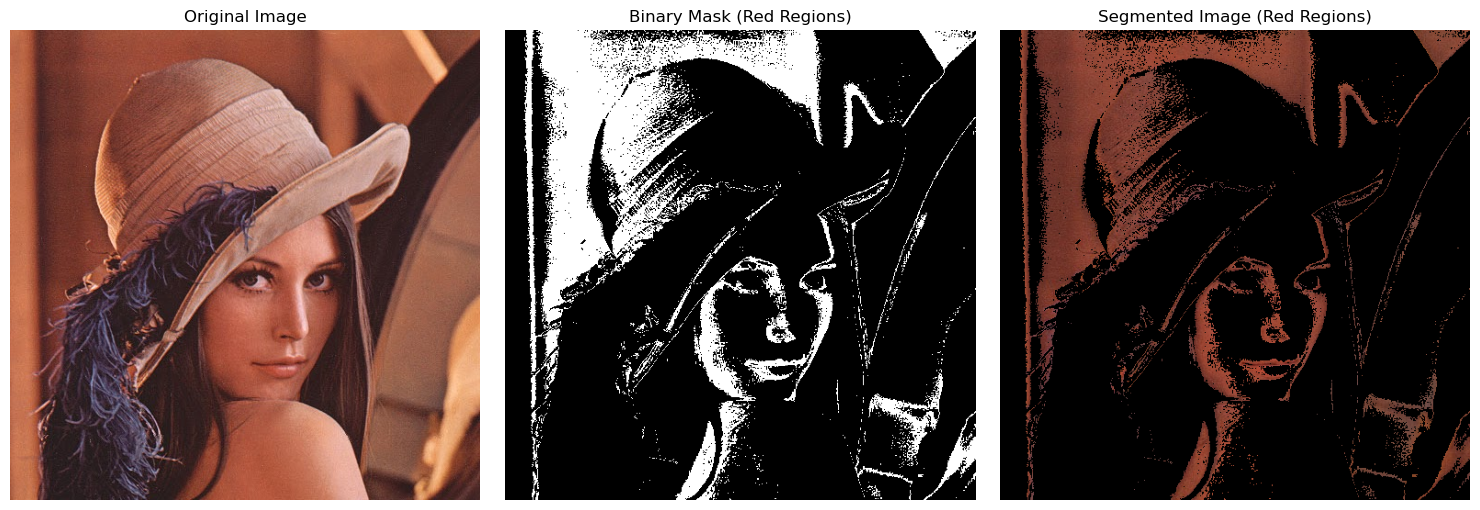

In [1]:
# This script demonstrates color segmentation in the RGB color space. 
# Instead of converting to HSI/HSV, the segmentation is performed directly on the Red, Green, and Blue channels.
#
# Steps:
# 
# 1. Load the input image in its original RGB format. 
#    - RGB represents the color as a combination of Red, Green, and Blue intensities.
# 
# 2. Define thresholds for the Red, Green, and Blue channels:
#    - For reddish regions, the Red channel value is expected to be high.
#    - The Green and Blue channel values are expected to be lower than the Red channel.
#
# 3. Create binary masks based on the defined thresholds:
#    - For example, a pixel is considered reddish if its Red channel value exceeds a threshold and its Green and Blue values are lower.
#
# 4. Combine the masks for all three channels to create a final binary mask.
#    - This mask isolates pixels satisfying all the conditions for being reddish.
#
# 5. Apply the binary mask to the original image:
#    - Use the mask to extract only the reddish regions from the input image.
#
# 6. Visualize the results:
#    - Display the original image, binary mask, and segmented image for comparison.
#
# RGB segmentation is simpler than HSI-based segmentation but can be less accurate due to the overlap of colors in the RGB space.
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image (replace with your image path)
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper visualization

# Step 2: Define thresholds for the Red, Green, and Blue channels
red_threshold = 100   # Adjust as needed
green_threshold = 80  # Adjust as needed
blue_threshold = 80   # Adjust as needed

# Step 3: Create binary masks
red_mask = image_rgb[:, :, 0] > red_threshold     # High red values
green_mask = image_rgb[:, :, 1] < green_threshold  # Low green values
blue_mask = image_rgb[:, :, 2] < blue_threshold   # Low blue values

# Step 4: Combine masks to create the final binary mask
final_mask = red_mask & green_mask & blue_mask

# Step 5: Apply the mask to the original image
segmented_image = cv2.bitwise_and(image_rgb, image_rgb, mask=final_mask.astype(np.uint8))

# Step 6: Display the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Binary mask
axes[1].imshow(final_mask, cmap='gray')
axes[1].set_title('Binary Mask (Red Regions)')
axes[1].axis('off')

# Segmented image
axes[2].imshow(segmented_image)
axes[2].set_title('Segmented Image (Red Regions)')
axes[2].axis('off')

plt.tight_layout()
plt.show()
